# Diabetes Health Indicators Dataset EDA

The dataset originally has 330 features (columns) but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean BRFSS data into a useable format for machine learning alogrithms.

Important risk factors for diabetes :

(blood pressure (high), cholesterol (high), smoking, diabetes, obesity, age, sex, race, diet, exercise, alcohol consumption, BMI, Household Income, Marital Status, Sleep, Time since last checkup, Education, Health care coverage, Mental Health )

About Columns :\
`Diabetes_binary` : you have diabetes (0,1)

`HighBP` : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

`HighChol` : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

`CholCheck` : Cholesterol check within past five years (0,1)

`BMI` : Body Mass Index (BMI)

`Smoker` : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

`Stroke` : (Ever told) you had a stroke. (0,1)

`HeartDiseaseorAttack` : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

`PhysActivity` : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

`Fruits` : Consume Fruit 1 or more times per day (0,1)

`Veggies` : Consume Vegetables 1 or more times per day (0,1)

`HvyAlcoholConsump` : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

`AnyHealthcare` : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

`NoDocbcCost` : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

`GenHlth` : Would you say that in general your health is: rate (1 ~ 5)

`MentHlth` : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

`PhysHlth` : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

`DiffWalk` : Do you have serious difficulty walking or climbing stairs? (0,1)

`Sex` : Indicate sex of respondent (0,1) (Female or Male)

`Age` : Fourteen-level age category (1 ~ 14)

`Education` : What is the highest grade or year of school you completed? (1 ~ 6)

`Income` : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

Dataset downloaded from https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?datasetId=1703281&sortBy=voteCount

In [1]:
#pip install optuna

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import phik

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from optuna.integration import CatBoostPruningCallback
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

RAND = 42
#!pip install optuna
import optuna
from optuna.samplers import TPESampler, RandomSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']] = df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

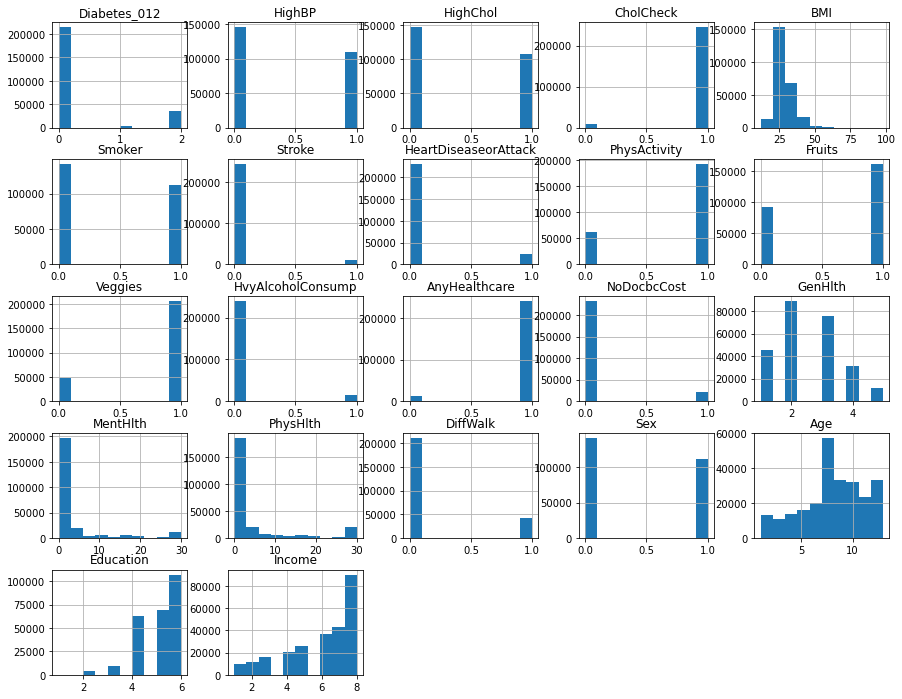

In [7]:
df.hist(figsize=(15, 12));

(-1.25, 1.25, -1.25, 1.25)

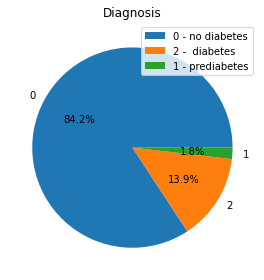

In [8]:
df.Diabetes_012.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
plt.legend(['0 - no diabetes', '2 -  diabetes', '1 - prediabetes'])
plt.title('Diagnosis')
plt.tight_layout()
plt.axis('off')

In [9]:
df['Diabetes_012'].value_counts()

0    213703
2     35346
1      4631
Name: Diabetes_012, dtype: int64

In [10]:
#saving 10% sample of original dataset for boost of plots drawing 
df_strata_0 = df[df['Diabetes_012'] == 0]
df_strata_1 = df[df['Diabetes_012'] == 1]
df_strata_2 = df[df['Diabetes_012'] == 2]

# stratifyed sampling of each group
df_sample_0 = df_strata_0.sample(frac=0.1, random_state=RAND)
df_sample_1 = df_strata_1.sample(frac=0.1, random_state=RAND)
df_sample_2 = df_strata_2.sample(frac=0.1, random_state=RAND)

# concat
df_sample = pd.concat([df_sample_0, df_sample_1, df_sample_2])
df_sample = df_sample.sample(frac=1, random_state=RAND)

In [11]:
#analysis of non-binary features
numeric = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']

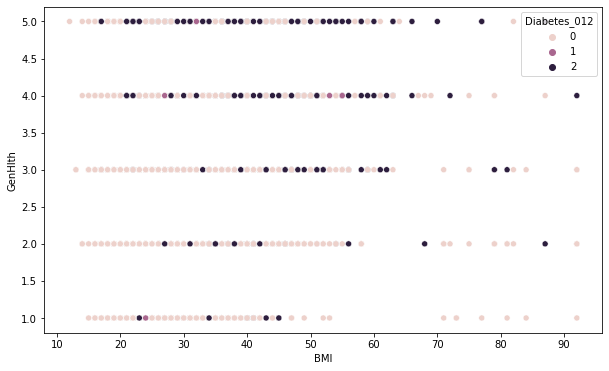

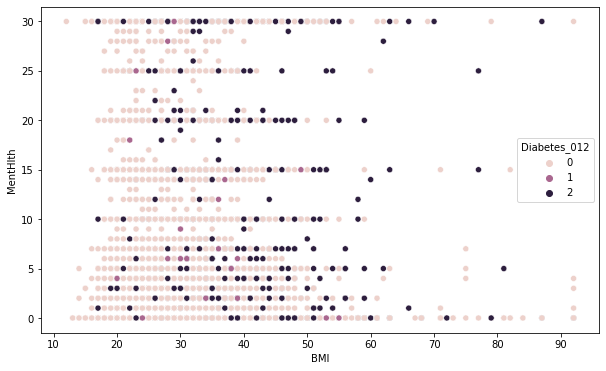

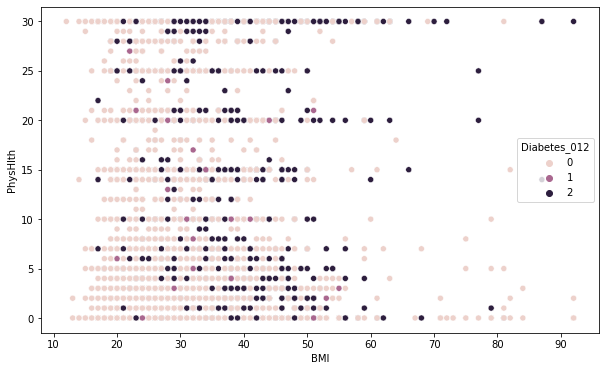

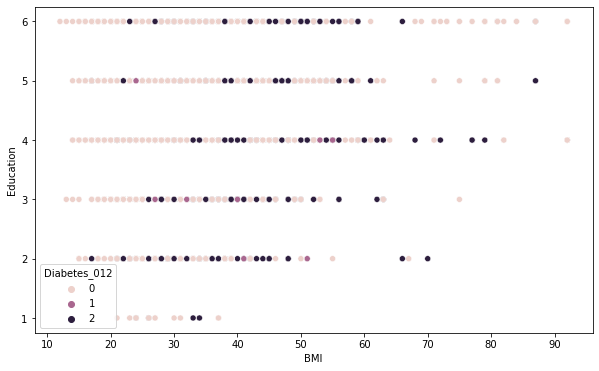

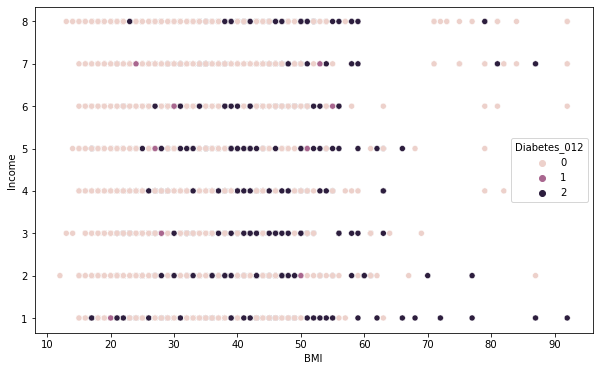

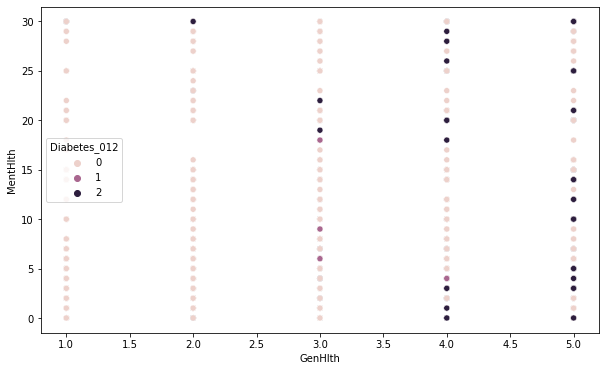

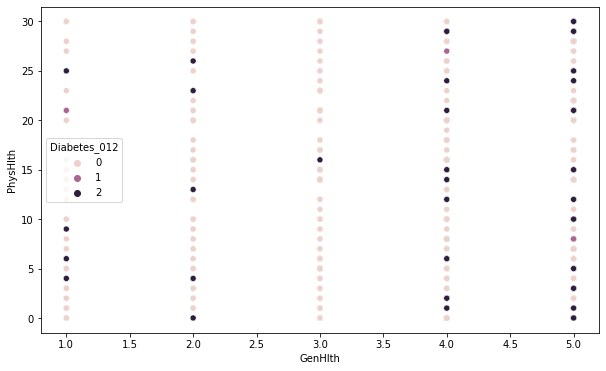

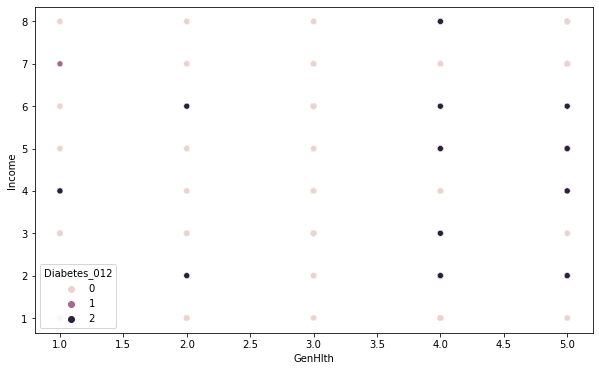

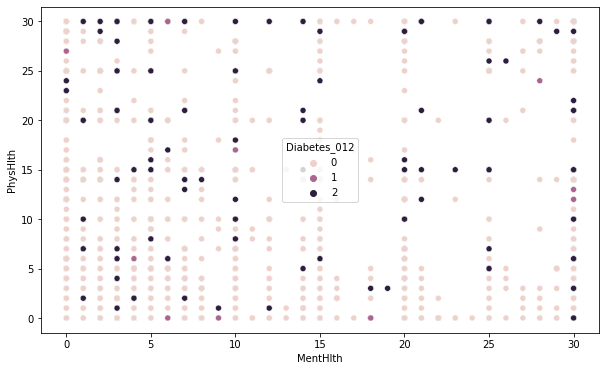

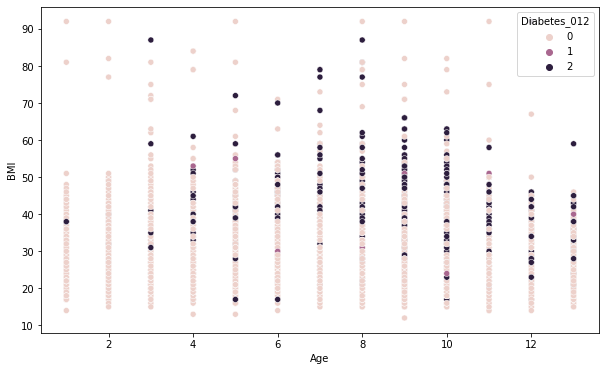

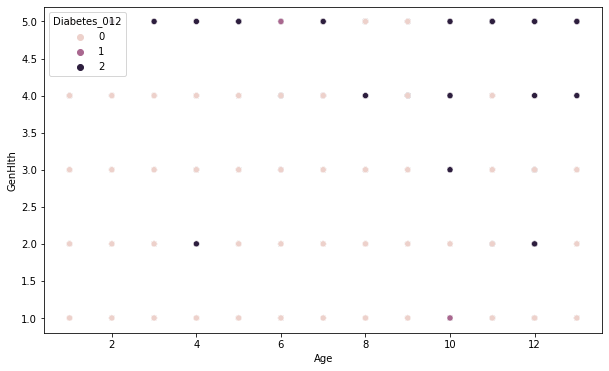

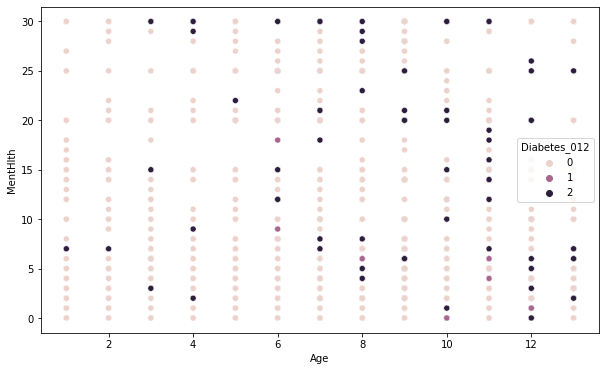

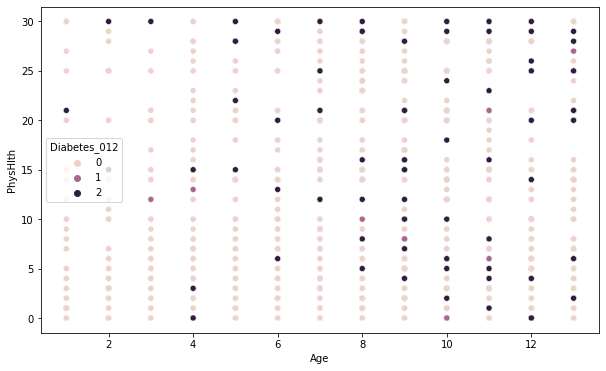

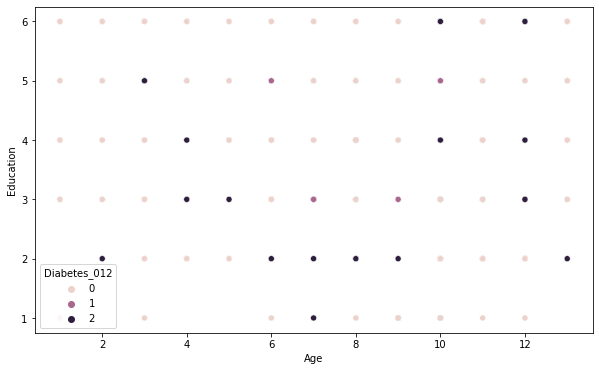

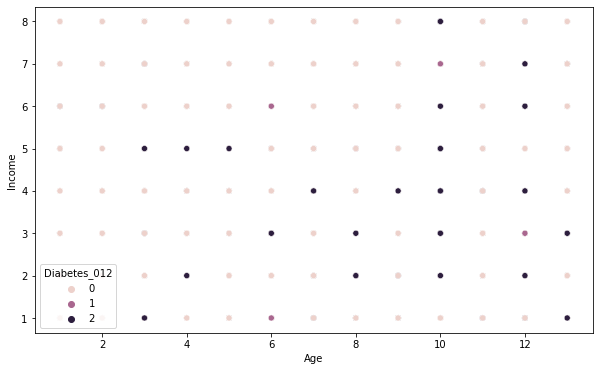

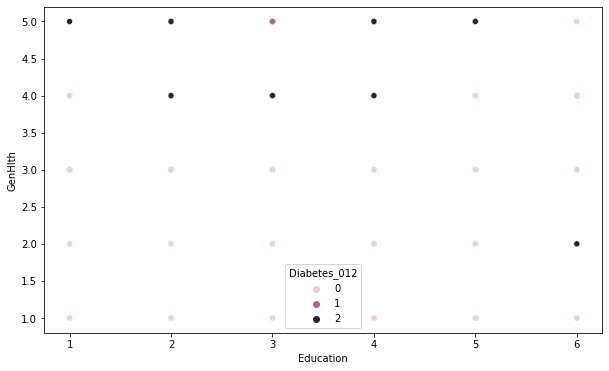

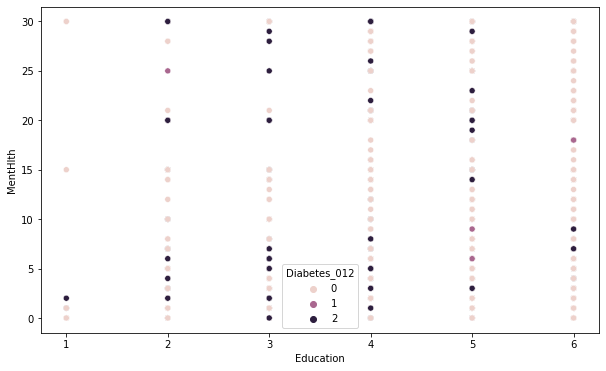

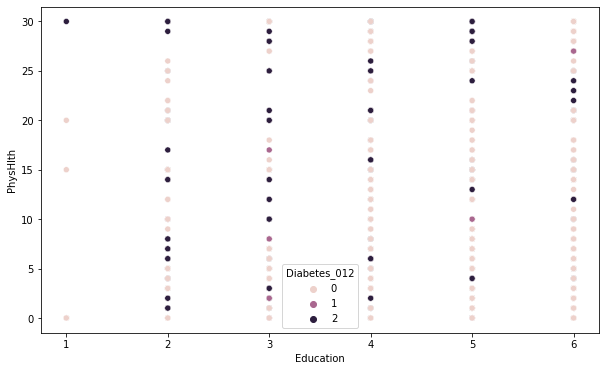

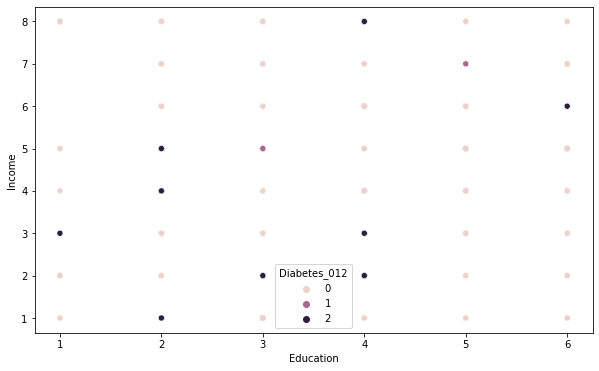

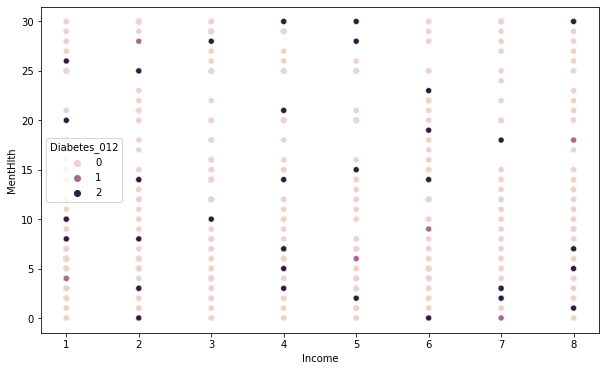

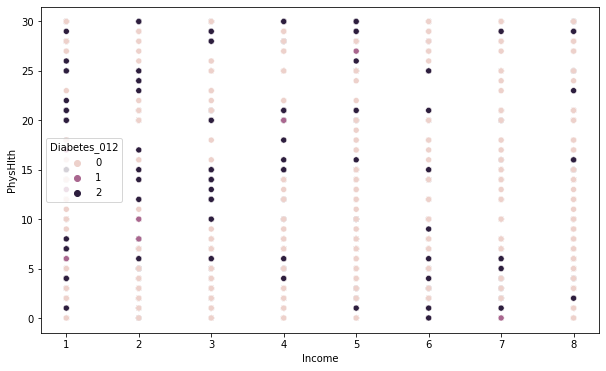

In [12]:
for i in numeric:
    for j in numeric:
        if i < j:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df_sample[i], y=df_sample[j], hue=df_sample['Diabetes_012']);
            plt.show()

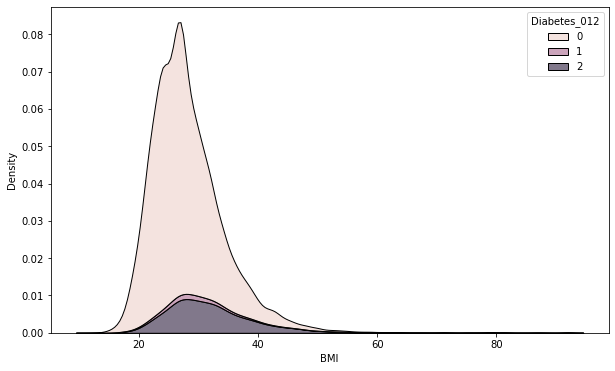

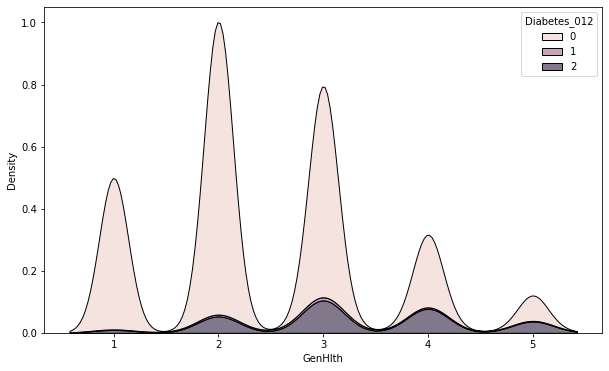

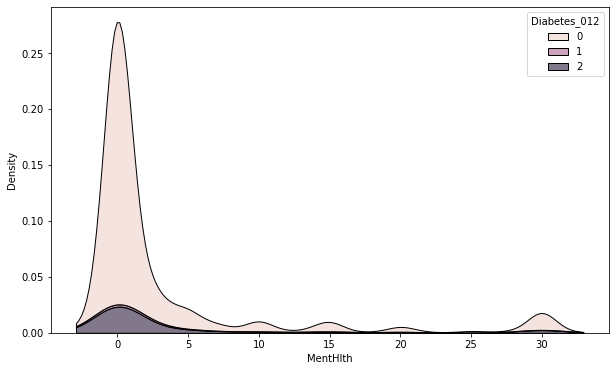

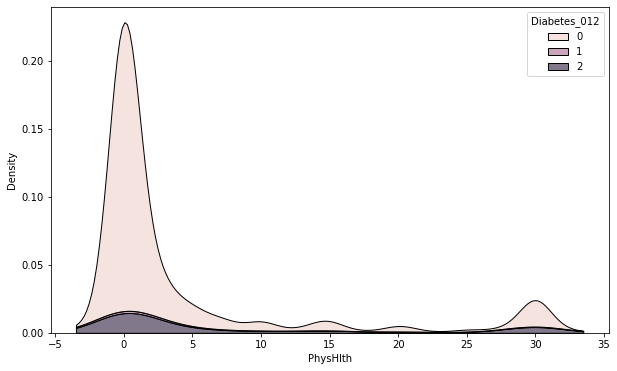

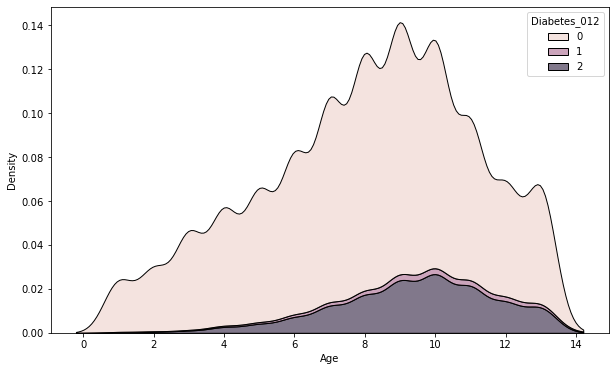

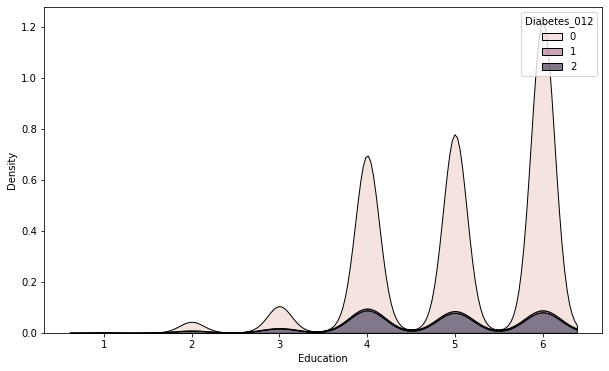

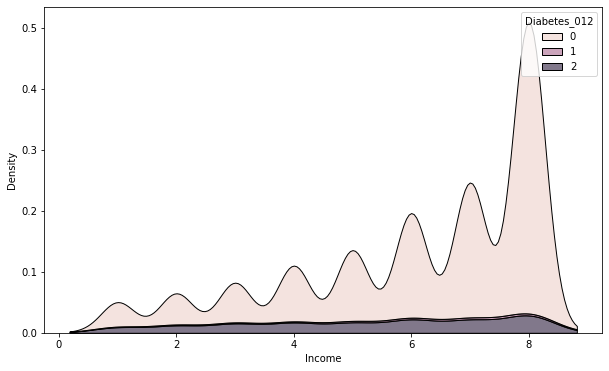

In [13]:
for x in numeric:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_sample, x=x, hue='Diabetes_012', multiple='stack', alpha=.6);
    plt.show()

### Preliminary conclusions:

The higher the GenHlth, BMI, Age, the greater the tendency to diabetes.

MentHlth, PhysHlth features have a weak connection with target. These features can be removed without loss of information.

The higher Education and Income, the less diabetes probability.

High GenHlth with low level of MentHlth increase diabetes probability.

In [14]:
#binary features analysis
binary = list(df.columns)
binary = [x for x in binary if x not in numeric]
binary = binary[1:]
binary

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

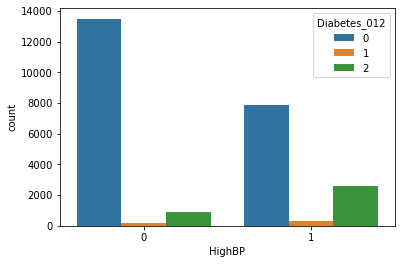

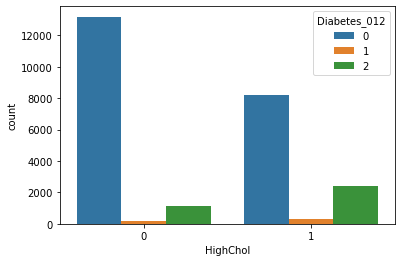

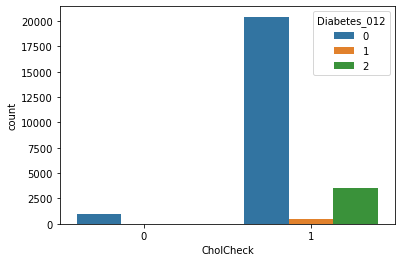

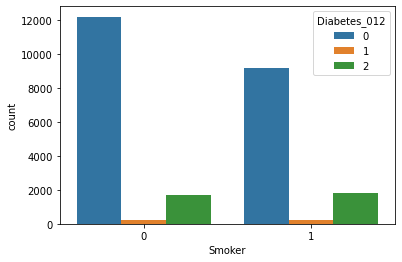

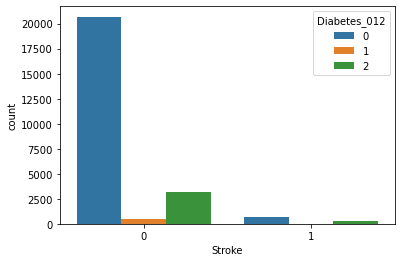

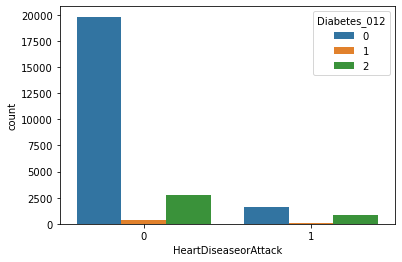

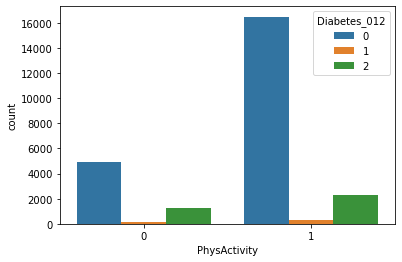

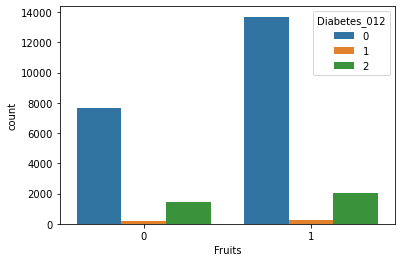

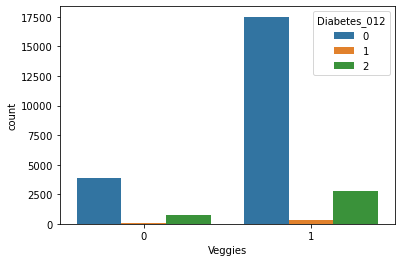

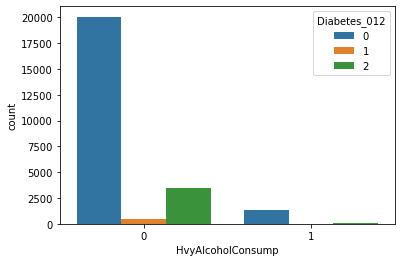

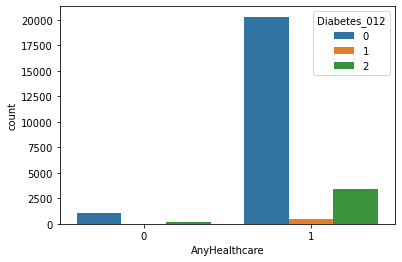

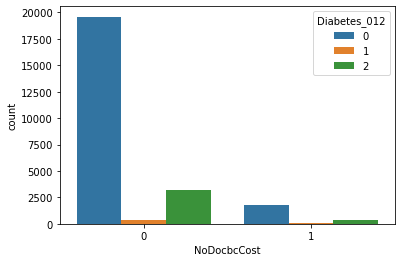

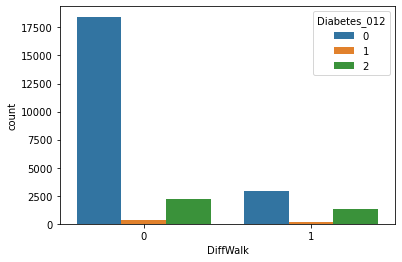

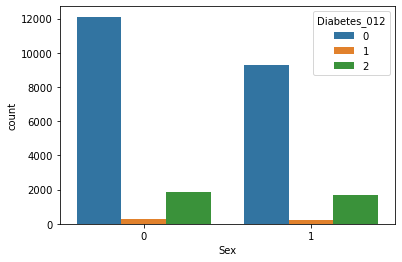

In [15]:
for x in binary:
    sns.countplot(data=df_sample, x=x, hue='Diabetes_012')
    plt.show()

### Conclusions

The higher the `GenHlth`, `BMI`, `Age`, the greater the tendency to diabetes.

`MentHlth`, `PhysHlth` features have a weak connection with target. These features can be removed without loss of information.

The higher `Education` and `Income`, the less diabetes probability.

High `GenHlth` with low level of `MentHlth` increase diabetes probability.

High level of `HighBP`, `HighChol` increase diabetes probability.

For value 1 in `HighBP`, `HighChol`, `DiffWalk`, `Smoke`, `Stroke`, `HeartDiseaseorAttack`, `Sex` risk of diabetes is more than for 0. Especially for the first three of mentioned features.

Value 0 in `Fruits` increase diabetes probability.

These features should be checked the other way.\
If their weak connection with target prooves, we should remove them.

`CholCheck`
`PhysActivity`
`Veggies`
`HvyAlcoholConsump`
`AnyHealthcare`
`NoDocbcCost`
`MentHlth`
`PhysHlth`

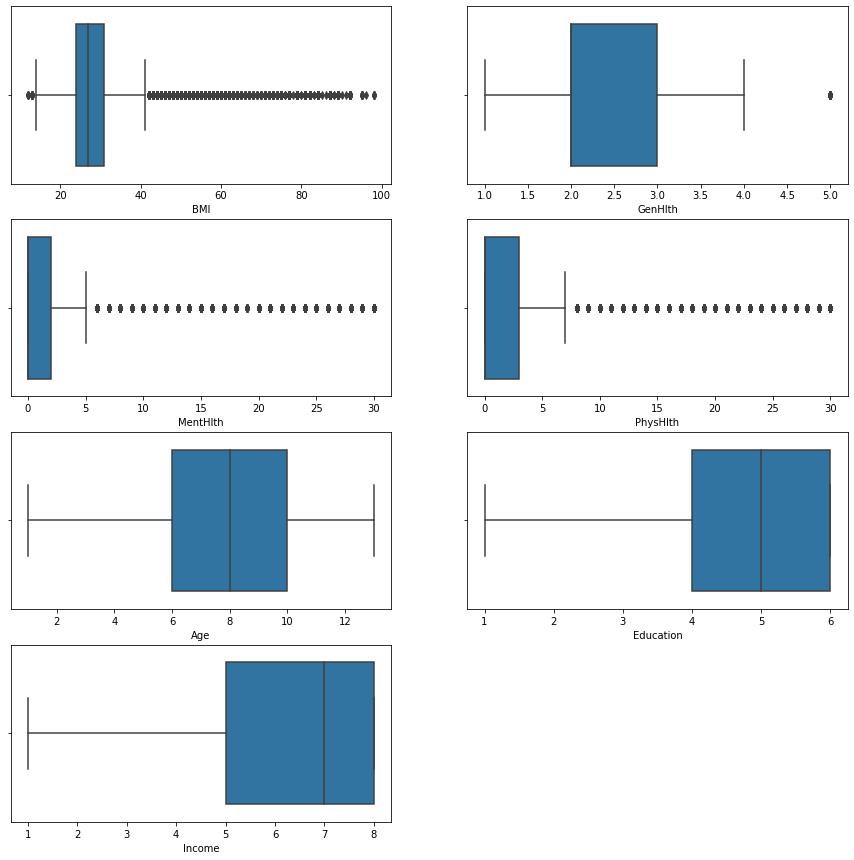

In [16]:
#outliers analysis
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

Visualising of correlations.

Last step showed the weak correlation of target with these features:\
`CholCheck`
`PhysActivity`
`Veggies`
`HvyAlcoholConsump`
`AnyHealthcare`
`NoDocbcCost`
`MentHlth`
`PhysHlth`

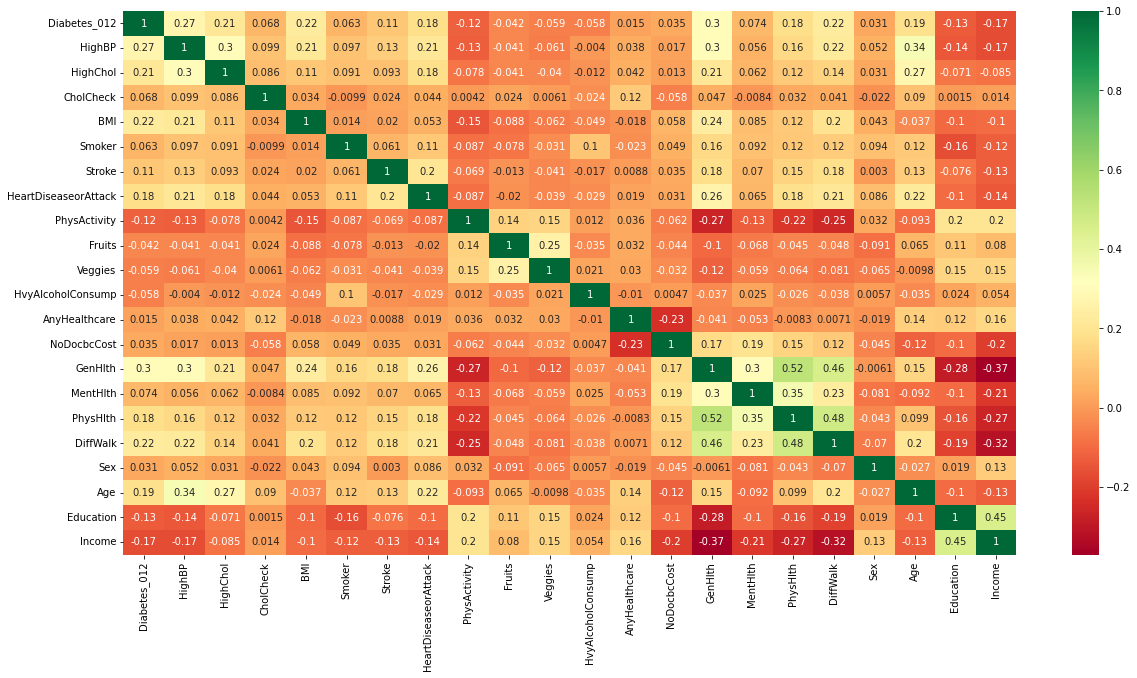

In [17]:
#Pirson correlations - it shows linear connections
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn");

interval columns not set, guessing: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
interval columns not set, guessing: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
interval columns not set, guessing: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


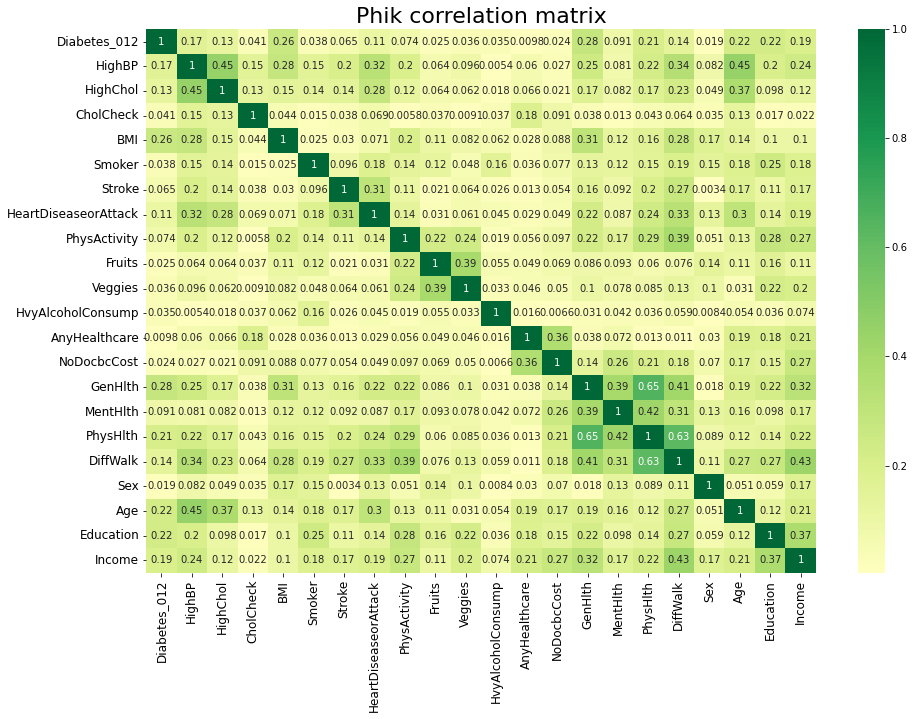

In [18]:
# phi correlations shows non-linear connections

plt.figure(figsize=(15, 10))
sns.heatmap(df.phik_matrix(),
            xticklabels=df.phik_matrix().columns,
            yticklabels=df.phik_matrix().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Phik correlation matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

`PhysHlth` has correlation with `DiffWalk` and `GenHlth`. It indirectly confirms  что косвенно подтверждает optionality of `PhysHlth` feature.

Some features make an extremely small informational contribution, so remove them: `CholCheck`, `PhysActivity`,`Veggies`, `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, `MentHlth`

`PhysHlth` - needs to be checked and maybe removed.

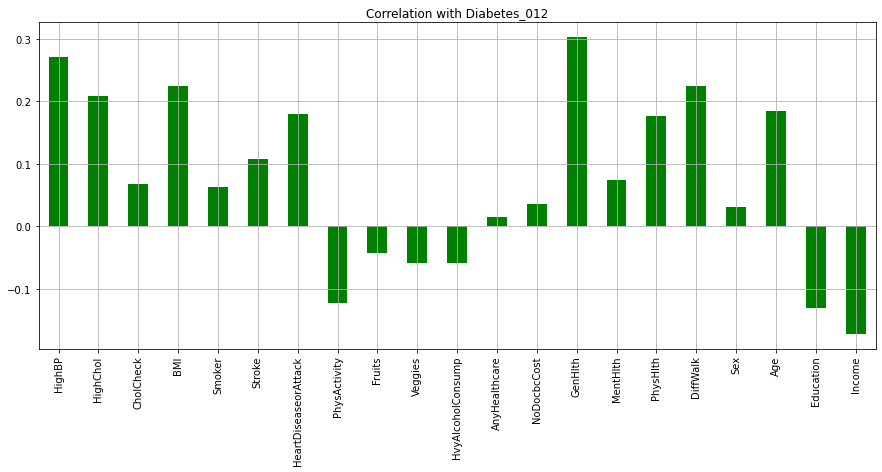

In [19]:
df.drop('Diabetes_012', axis=1).corrwith(
    df.Diabetes_012
).plot(
    kind='bar', 
    grid=True, 
    figsize=(15, 6), 
    title="Correlation with Diabetes_012",
    color="green"
);

## Correction of the dataset

In [20]:
print('Duplicates:', df.duplicated().sum())
print('Duplicates without diagnosis:', df.drop('Diabetes_012', axis=1).duplicated().sum())

Duplicates: 23899
Duplicates without diagnosis: 25772


In [21]:
#removing of useless columns
df = df.drop(['CholCheck', 
              'PhysActivity', 
              'Veggies', 
              'HvyAlcoholConsump', 
              'AnyHealthcare', 
              'NoDocbcCost', 
              'MentHlth',
              'PhysHlth'], axis=1)

#removing of outliers
lower_threshold = df['BMI'].quantile(0.25) - 1.5 * (df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25))
upper_threshold = df['BMI'].quantile(0.75) + 1.5 * (df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25))

df = df[(df['BMI'] >= lower_threshold) & (df['BMI'] <= upper_threshold)]

In [22]:
#drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [23]:
print('Duplicates:', df.duplicated().sum())
print('Duplicates without diagnosis:', df.drop('Diabetes_012', axis=1).duplicated().sum())

Duplicates: 0
Duplicates without diagnosis: 7114


In [24]:
# filtering rows with the same values in all columns except 'Diabetes_012'
duplicates_filtered = df[df.drop('Diabetes_012', axis=1).duplicated()]

# counting of rows with "0", "1" and "2" in the column 'Diabetes_012'
diabetes_counts = duplicates_filtered['Diabetes_012'].value_counts()

# results
print("Rows with '0' in column 'Diabetes_012':", diabetes_counts[0])
print("Rows with '1' in column 'Diabetes_012':", diabetes_counts[1])
print("Rows with '2' in column 'Diabetes_012':", diabetes_counts[2])

Rows with '0' in column 'Diabetes_012': 2780
Rows with '1' in column 'Diabetes_012': 765
Rows with '2' in column 'Diabetes_012': 3569


In the preprocessed dataset, there are 7114 rows in which all signs except for the diagnosis are the same - there are approximately an equal number of both healthy and sick people with the same sets of signs. It means **none of the available signs and/or combinations of them is critically important in the diagnosis of diabetes**.

In [25]:
# filtering rows with the same values in all columns except 'Diabetes_012'
#duplicates_filtered = df[df.drop('Diabetes_012', axis=1).duplicated()]

# receiving of indexes of duplicated rows
duplicate_indices = duplicates_filtered.index

# removing duplicated rows with 'Diabetes_012'=0 - it's a liitle bit cheating, but
# recall in more important than precision in this case, so this is acceptably
df = df.drop(df[(df.index.isin(duplicate_indices)) & (df['Diabetes_012'] == 0)].index).reset_index(drop=True)

In [26]:
print('Duplicates:', df.duplicated().sum())
print('Duplicates without diagnosis:', df.drop('Diabetes_012', axis=1).duplicated().sum())

Duplicates: 0
Duplicates without diagnosis: 4334


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169435 entries, 0 to 169434
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          169435 non-null  int32
 1   HighBP                169435 non-null  int32
 2   HighChol              169435 non-null  int32
 3   BMI                   169435 non-null  int32
 4   Smoker                169435 non-null  int32
 5   Stroke                169435 non-null  int32
 6   HeartDiseaseorAttack  169435 non-null  int32
 7   Fruits                169435 non-null  int32
 8   GenHlth               169435 non-null  int32
 9   DiffWalk              169435 non-null  int32
 10  Sex                   169435 non-null  int32
 11  Age                   169435 non-null  int32
 12  Education             169435 non-null  int32
 13  Income                169435 non-null  int32
dtypes: int32(14)
memory usage: 9.0 MB


In [28]:
df['Diabetes_012'].value_counts()

0    134451
2     30676
1      4308
Name: Diabetes_012, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

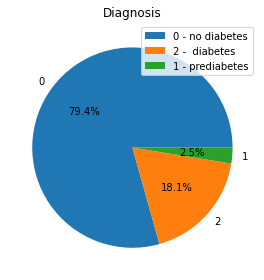

In [29]:
df.Diabetes_012.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
plt.legend(['0 - no diabetes', '2 -  diabetes', '1 - prediabetes'])
plt.title('Diagnosis')
plt.tight_layout()
plt.axis('off')

## Downsampling

In [30]:
# Step 1: Create a boolean mask for rows where 'Diabetes_012' is 0
mask_zeros = df['Diabetes_012'] == 0

# Step 2: Filter the DataFrame to select rows where 'Diabetes_012' is 0
df_zeros = df[mask_zeros]

# Step 3: Randomly sample 25% of the rows where 'Diabetes_012' is 0
sampled_zeros = df_zeros.sample(frac=0.25, random_state=42)

# Step 4: Create a boolean mask for rows where 'Diabetes_012' is not 0
mask_non_zeros = df['Diabetes_012'] != 0

# Step 5: Filter the DataFrame to select rows where 'Diabetes_012' is not 0
df_non_zeros = df[mask_non_zeros]

# Step 6: Concatenate the sampled zeros and non-zeros DataFrames
df_downsampled = pd.concat([sampled_zeros, df_non_zeros], ignore_index=True)

## Dividing the dataset into 2 for 2 stages of training

In [31]:
df_01 = df_downsampled.copy() # here we replace 2 to 1 for the first model which will distinguish healthy and diabetics
df_12 = df_downsampled.copy() # here we will leave only the values 2 and 1, so that the second model distinguishes diabetics from prediabetics

df_01.loc[df_01['Diabetes_012'] == 2, 'Diabetes_012'] = 1

df_12 = df_12.query('Diabetes_012 != 0')

In [32]:
df_01['Diabetes_012'].unique()

array([0, 1])

In [33]:
df_12['Diabetes_012'].unique()

array([2, 1])

## Train \ test split for the first model

In [34]:
X_01 = df_01.drop(['Diabetes_012'], axis=1)
y_01 = df_01['Diabetes_012']

In [35]:
X01_train, X01_test, y01_train, y01_test = train_test_split(X_01, y_01,  test_size = 0.3, random_state=RAND, stratify=df_01['Diabetes_012'])

In [36]:
y01_train.shape

(48017,)

In [37]:
sum(y01_train == 1)

24488

In [38]:
y01_test.shape

(20580,)

In [39]:
sum(y01_test == 1)

10496

In [40]:
#the ratio of 0 to 1 in the target after separation
display(round((sum(y01_train == 1) / y01_train.shape[0]), 2))
display(round((sum(y01_test == 1) / y01_test.shape[0]), 2))

0.51

0.51

The samples are divided correctly

## Learning

In [41]:
# function for getting report of model
def model_report(model, X, y, label=None):
    
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    y_proba_one = y_proba[:, 1]
    
    roc_auc = roc_auc_score(y, y_proba_one)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    results.loc[label, 'AUC-ROC'] = roc_auc
    results.loc[label, 'Accuracy'] = accuracy
    results.loc[label, 'Precision'] = precision
    results.loc[label, 'Recall'] = recall
    results.loc[label, 'F1'] = f1
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
    
    fpr, tpr, thresholds = roc_curve(y, y_proba_one)
    lw = 2
    axes[0].plot(fpr, tpr, lw=lw, color='grey')
    axes[0].plot([0, 1], [0, 1], color='r')
    axes[0].set_xlim([-0.02, 1])
    axes[0].set_ylim([0.0, 1.02])
    axes[0].set_xlabel('\nFalse Positive Rate')
    axes[0].set_ylabel('True Positive Rate\n')
    axes[0].text(0.6, 0.2,
                'ROC-AUC = {:.2f}\n\nAccuracy = {:.2f}\n\nPrecision = {:.2f}\n\nRecall = {:.2f}\n\nF1 = {:.2f}'
                 .format(roc_auc, accuracy, precision, recall, f1))
    
    cm = confusion_matrix(y, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    pcts = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, pcts)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Reds', fmt ='', ax=axes[1]) 
    axes[1].set_xlabel('\nPredict')
    axes[1].set_ylabel('True value\n')
    
    plt.tight_layout()
    plt.show()
    
    report = classification_report(
        y, y_pred,
        target_names=['Non-diabet', 'diabet_or_prediabet'], output_dict=True
    )

In [42]:
results = pd.DataFrame(
    [[0] * 5] * 3,
    index=['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier'],
    columns=['AUC-ROC', 'Accuracy', 'Precision', 'Recall', 'F1'])

## LogisticRegression

In [43]:
#selection of model parameters
paramsLR = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
modelLR = LogisticRegression(random_state=RAND, solver='liblinear', class_weight='balanced')

gridLR = GridSearchCV(modelLR, paramsLR, cv=5, scoring='roc_auc')
 
gridLR.fit(X01_train, y01_train)

score_lr = gridLR.best_score_

print('Best params:', gridLR.best_params_)             
print('ROC-AUC:', score_lr)

Best params: {'C': 0.1, 'penalty': 'l1'}
ROC-AUC: 0.7680363695577174


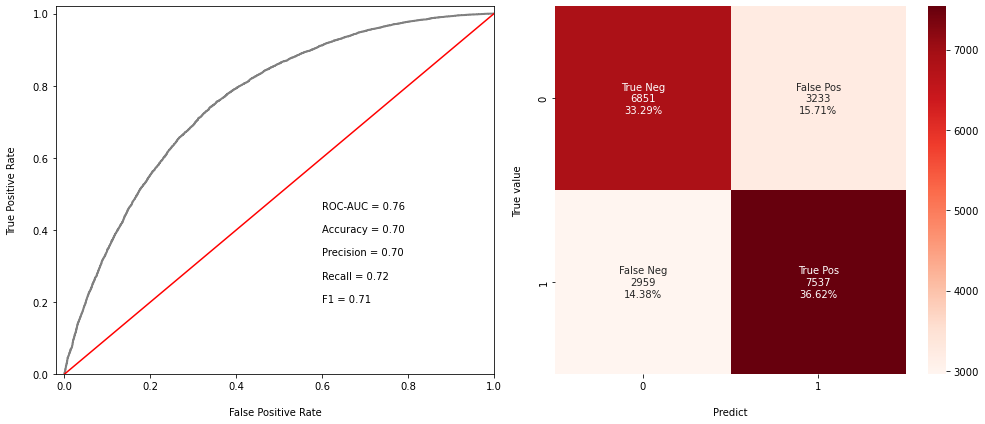

In [57]:
model_lr = LogisticRegression(random_state=RAND, 
                              C=0.1, penalty='l1', 
                              solver='liblinear', 
                              class_weight='balanced')
model_lr.fit(X01_train, y01_train)

model_report(model_lr, X01_test, y01_test, label='LogisticRegression')

## Random Forest

In [45]:
%%time

#selection of model parameters

clf = RandomForestClassifier(random_state=RAND)

parametrs = { 'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1, 9, 2),
              'min_samples_split': range(2, 10, 2) }

grid = GridSearchCV(clf, parametrs, scoring='roc_auc', cv=5)
grid.fit(X01_train, y01_train)
grid.best_params_

CPU times: total: 12min 44s
Wall time: 15min 31s


{'max_depth': 11,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 50}

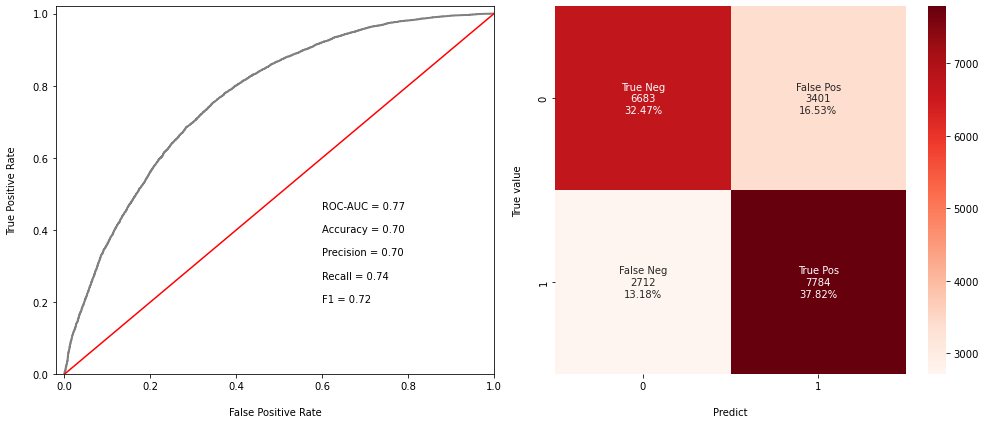

In [46]:
model_rf = RandomForestClassifier(random_state=RAND,
                                 n_estimators=500,
                                 max_depth=11,
                                 min_samples_leaf=7,
                                 min_samples_split=2)
model_rf.fit(X01_train, y01_train)

model_report(model_rf, X01_test, y01_test, label='RandomForestClassifier')

## CatBoost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

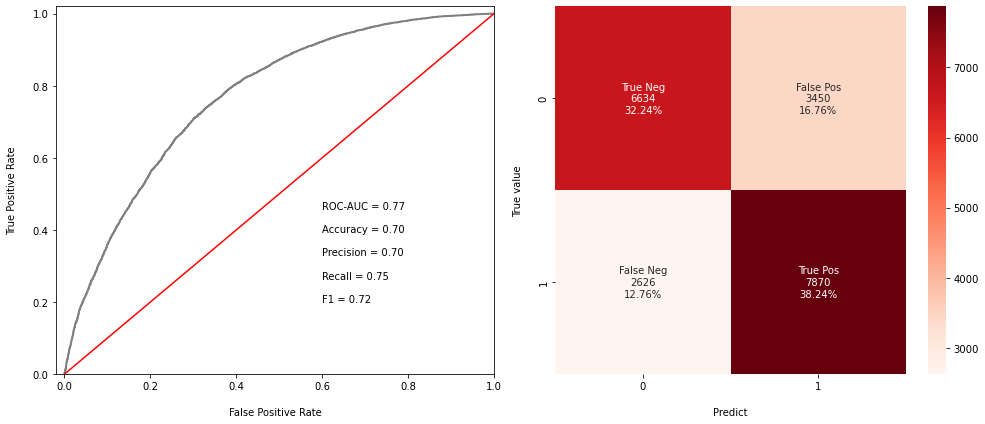

In [56]:
#as an experiment we try to learn CatBoost with default parameters
model = CatBoostClassifier(iterations=1000, 
                           loss_function="Logloss", 
                           verbose=False,
                           random_state=RAND)
model.fit(X01_train, y01_train, plot=True)

model_report(model, X01_test, y01_test, label='CatBoost_default')

In [48]:
param_grid = [{
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': range(1, 11, 2),
    'l2_leaf_reg': range(3, 9, 2),
    'has_time': [True],
    'random_state': [RAND],
}]

model_cb = CatBoostClassifier(iterations=100, loss_function="Logloss", class_weights = (1, 4), verbose=False)

grid_search_cb = GridSearchCV(model_cb, param_grid, cv=5, scoring='roc_auc', n_jobs=1)
grid_search_cb.fit(X01_train, y01_train)

roc_auc_cb = grid_search_cb.best_score_

print(f'roc_auc CatBoost: {roc_auc_cb}') 
print(f'Best params: {grid_search_cb.best_params_}')

roc_auc CatBoost: 0.7774784126674334
Лучшие гиперпараметры: {'depth': 9, 'has_time': True, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_state': 42}


In [58]:
model_cb = CatBoostClassifier(iterations=500,
                              depth=9,
                              has_time=True,
                              l2_leaf_reg=5,
                              learning_rate=.1,
                              random_state=RAND,
                              loss_function="Logloss", 
                              verbose=False)
model_cb.fit(X01_train, y01_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

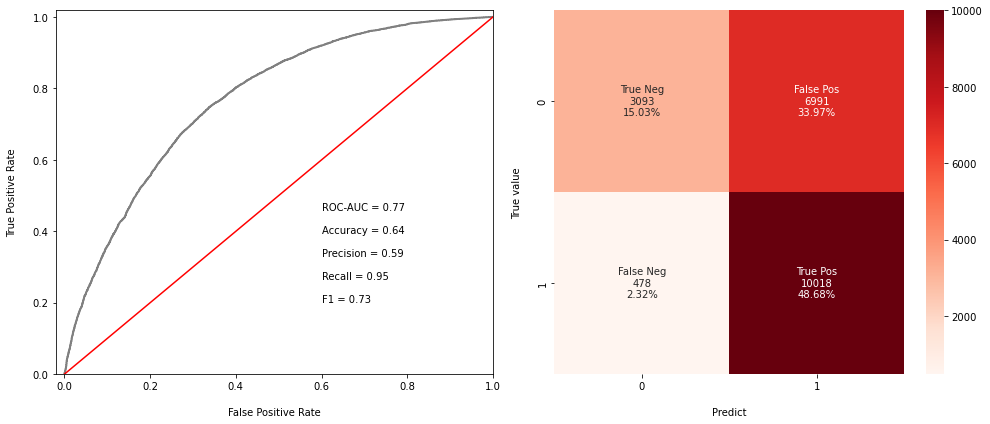

In [50]:
model_report(model_cb, X01_test, y01_test, label='CatBoostClassifier')

In [61]:
# getting probabilities of belonging to classes
y_pred_proba = model_cb.predict_proba(X01_test)

# changing the threshold value for metric optimization
threshold = 0.35
y_pred = [1 if prob[1] > threshold else 0 for prob in y_pred_proba]

# metric evaluating
precision = precision_score(y01_test, y_pred)
recall = recall_score(y01_test, y_pred)
f1 = f1_score(y01_test, y_pred)
accuracy = accuracy_score(y01_test, y_pred)

print(precision)
print(recall) # need to be maximized
print(f1)
print(accuracy)

0.6355330662731042
0.8615663109756098
0.7314863498483316
0.677405247813411


## Models comparison

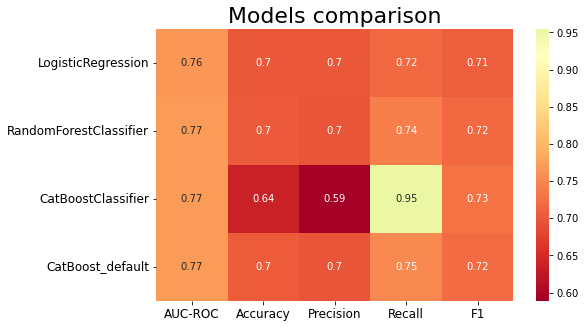

In [59]:
plt.figure(figsize=(8, 5))
sns.heatmap(results,
            xticklabels=results.columns,
            yticklabels=results.index, 
            cmap='RdYlGn', center=0.92, annot=True)
plt.title('Models comparison', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

## Keras (bonus)

In [53]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(X01_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['AUC', 'accuracy'])

# Train the model
model.fit(X01_train, y01_train, batch_size=32, epochs=10,
         validation_data=(X01_test, y01_test))

Epoch 1/10
1501/1501 [==============================] - 6s 3ms/step - loss: 0.5987 - auc: 0.7408 - accuracy: 0.6779 - val_loss: 0.5828 - val_auc: 0.7647 - val_accuracy: 0.7000
Epoch 2/10
1501/1501 [==============================] - 3s 2ms/step - loss: 0.5776 - auc: 0.7647 - accuracy: 0.7007 - val_loss: 0.5952 - val_auc: 0.7657 - val_accuracy: 0.6863
Epoch 3/10
1501/1501 [==============================] - 3s 2ms/step - loss: 0.5745 - auc: 0.7676 - accuracy: 0.7011 - val_loss: 0.5772 - val_auc: 0.7662 - val_accuracy: 0.7009
Epoch 4/10
1501/1501 [==============================] - 3s 2ms/step - loss: 0.5739 - auc: 0.7679 - accuracy: 0.7016 - val_loss: 0.5754 - val_auc: 0.7661 - val_accuracy: 0.7036
Epoch 5/10
1501/1501 [==============================] - 4s 3ms/step - loss: 0.5722 - auc: 0.7694 - accuracy: 0.7022 - val_loss: 0.5857 - val_auc: 0.7664 - val_accuracy: 0.6898
Epoch 6/10
1501/1501 [==============================] - 3s 2ms/step - loss: 0.5720 - auc: 0.7694 - accuracy: 0.7031 - va

In [54]:
# receiving of predictions based on test data
y_pred = model.predict(X01_test)

# transformation of predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# calculating metrics
roc_auc = roc_auc_score(y01_test, y_pred)
accuracy = accuracy_score(y01_test, y_pred_binary)
f1 = f1_score(y01_test, y_pred_binary)
precision = precision_score(y01_test, y_pred_binary)
recall = recall_score(y01_test, y_pred_binary)

# printing metrics
print("ROC-AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)


644/644 [==============================] - 1s 914us/step
ROC-AUC: 0.7684949473205561
Accuracy: 0.7035471331389699
F1-score: 0.7230468927323075
Precision: 0.6905401890228041
Recall: 0.758765243902439


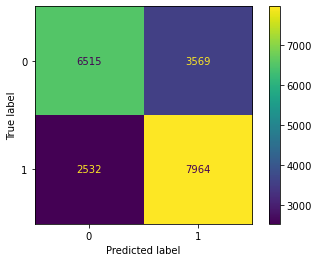

In [55]:
# confusion matrix calculation
cm = confusion_matrix(y01_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

disp.plot()
plt.show()

## Final conclusion

None of the signs and/or combinations of them available in the dataset is critically important in the diagnosis of diabetes, so it is not possible to make a reliable diagnostic tool with this data set.